# Proyecto 10, Toma de decisiones de negocios basadas en datos

# Objetivos generales del proyecto

En esta ocasion estamos trabajando con una gran tienda online, de nombre desconocido. 

Nuestra tarea es trabajar junto con el departamento de marketing, donde se ha recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos para nuestra tienda.

Nuestra primer tarea es priorizar estas hipótesis, se lanzará un test A/B y nuestro trabajo es analizar los resultados de dicha prueba para decidir si estan dando resultados nuestras pruebas y es momento de continuar o parar el test.

# Descripción de los datas

***Data hipotesis** 

-Hypotheses: breves descripciones de las hipótesis.

-Reach: alcance del usuario, en una escala del uno a diez.

-Impact: impacto en los usuarios, en una escala del uno al diez.

-Confidence: confianza en la hipótesis, en una escala del uno al diez.

-Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.


**Data orders** 

-transactionId: identificador de pedido.

-visitorId: identificador del usuario que realizó el pedido.

-date: fecha del pedido.

-revenue: ingresos del pedido.

-group: el grupo del test A/B al que pertenece el usuario.


**Data visits** 

-date: la fecha.

-group: grupo de la prueba A/B.

-visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.


# Preparación y limpieza de todos los datas

In [1]:
#cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
#cargar los archivos
hipotesis= pd.read_csv("/datasets/hypotheses_us.csv", sep=";")
orders= pd.read_csv("/datasets/orders_us.csv")
visits= pd.read_csv("/datasets/visits_us.csv")

In [3]:
#inicia el análisis de la tabla hipotesis
#manda a llamar info para conocer el tipo de datos que tenemos y analizar si debemos cambiar el tipo de datos
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#llama a head para visualizar el data
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [5]:
#buscar valores ausentes
print(hipotesis.isna().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64


In [6]:
#manda a llamar info para conocer el tipo de datos que tenemos y analizar si debemos cambiar el tipo de datos
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [8]:
#cambiar el tipo de dato a datetime de la columna date
orders["date"]=pd.to_datetime(orders["date"] , format="%Y-%m-%d")

In [9]:
#buscar valores ausentes
print(orders.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [10]:
#buscar filas duplicadas
print(orders.duplicated().sum())

0


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [12]:
#manda a llamar info para conocer el tipo de datos que tenemos y analizar si debemos cambiar el tipo de datos
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
#cambiar el tipo de dato a datetime de la columna date
visits["date"]=pd.to_datetime(visits["date"] , format="%Y-%m-%d")

In [15]:
#buscar valores ausentes
print(visits.isna().sum())

date      0
group     0
visits    0
dtype: int64


In [16]:
#buscar filas duplicadas
print(visits.duplicated().sum())

0


In [17]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


En general, los datas venian completos, solo se corroboró que no vinieran con inormación faltante o duplicada. Se cambio el tipo de dato de las columnas del día para mejor manejo de esta información.


# Parte 1

# Priorizar la hipótesis

Como ya se nos fue explicado estamos trabajando junto con el departamnto de marketing para priorizar las hipótesis propuestas por la empresa. En total se an definido 9 hipótesis y han sido calificadas en cuanto al impacto, confianza, esfuerzo y alacnce que genera cada una.

Nuestra primer tarea es tomar el data de hipótesis  explicar mediante pruebas que hipótesis tendrán mjejor impacto y podemos evaluar inmediatamnete y cuales otras no darían tan buenos resultados.

In [18]:
#Crear una columna para calcular ICE  
hipotesis["ICE"]= (hipotesis["Impact"]* hipotesis["Confidence"])/ hipotesis["Effort"]

In [19]:
# Calculo de Ice ideendiente, ordenado en orden descendente de prioridad.
ICE= ((hipotesis["Impact"]* hipotesis["Confidence"])/ hipotesis["Effort"]).sort_values(ascending=False)
ICE

8    16.200000
0    13.333333
7    11.200000
6     8.000000
2     7.000000
1     2.000000
5     1.333333
3     1.125000
4     1.000000
dtype: float64

Al calcular ICE podemos identificar las hipotesis con mayor prioridad, recordemos que solo tomamos en cuenta el impacto, la confiana y el esfuerzo requerido para estas hipótesis.

Nuestras 3 principales hipótesis a considerar con esta prueba son:

8 Lanzar una promosión con descuentos

0 Agregar 2 nuevos canales para aumnetar el tráfico de usuarios

7 Añadir un nuevo formulario con suscripción en las páginas principales

Logramos observar que los descuentos siemrpe serán una forma fácil de atraer más ventas, pero poniendo en duda las ganancias.
Más canales puede ser buena idea pero podría ser mayor gasto en marketing
Formularios podrian usarse para dar mayor exclusividad e información de los clientes.

Las 3 hipótesis suenan buenas, pero debemos comparar con el RICE para una mejor tomar de decisiones.

In [20]:
#Crea una columna nueva para calcular RICE 
hipotesis["RICE"]= (hipotesis["Reach"] *hipotesis["Impact"]* hipotesis["Confidence"])/ hipotesis["Effort"]

In [21]:
# Calculo de Ice ideendiente, ordenado en orden descendente de prioridad.
RICE= ((hipotesis["Reach"] *hipotesis["Impact"]* hipotesis["Confidence"])/ hipotesis["Effort"]).sort_values(ascending=False)
RICE

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
dtype: float64

Al calcular RICE tendremos un nuevo orden de prioridades ya que recordemos tomamos en cuenta el impacto, la confianza, el esfuerzo y el **alcalce ** en los usuarios, lo que nos da un mejor manorama para evaluar lass hipótesis.

Nuestras 3 principales hipótesis a considerar con esta prueba son:

7 Añadir un nuevo formulario con suscripción en las páginas principales

2 Añadir bloques de recomendaciones a los productos

6 Mostrar banner con oferta y rebajas vigentes

Logramos observar que la hipótesis 7 sigue estando dentro de las hipótesis más imoprtantes, está es una buena señal para priorizarla.
Los bloques de  recomendaciones puede llegar a ser un trabajo cansado si tenemos muchos productos a ofrecer, pero traerá la atención del usuario, logrando su interes y aumentando las ventas de otros productos.
Y mostrar los descuentos y ofertas ya decididos por la empresa, atraerá gente en busqueda de ofertas, disminuir el stock si es lo buscado por la empresa y nuevos clientes que nos conozcan con la ayuda de los descuentos.

Como vemos las 3 hipotesis mencionadas en esta prueba tiene lógica con el objetivo y nos ayudan a mejorar la toma de decisiones en cuento a que hipótesis priorizar con mayor exactitud.

In [22]:
#muestra la tabla con las nuevas columnas 
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


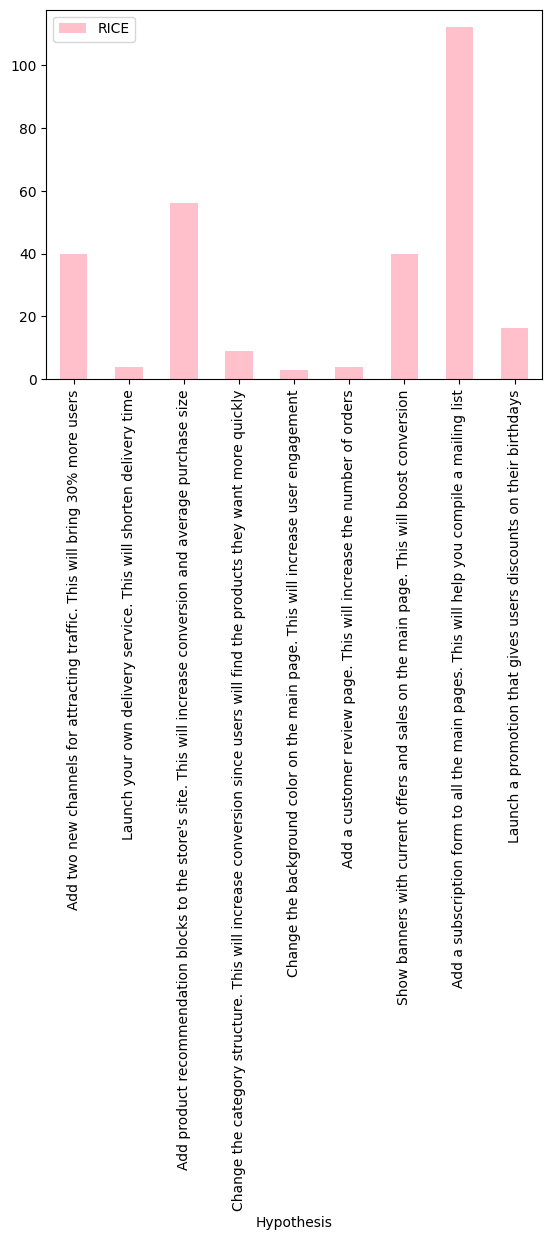

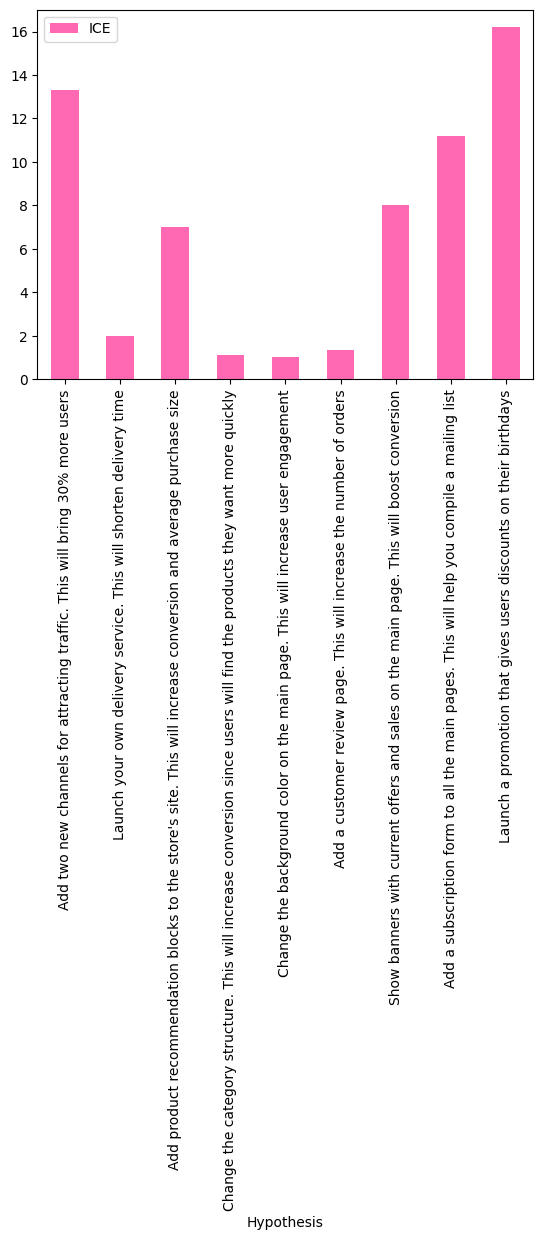

In [23]:
#Crea un gráfico para mostrar la diferencia entre RICE y ICE.
hipotesis.plot(x="Hypothesis", y ="RICE",kind="bar", label="RICE", color="pink")
hipotesis.plot(x="Hypothesis", y="ICE",kind="bar", label="ICE", color="hotpink")
plt.show()

Como podemo observar la lista de prioridades entre ICE y RICE cambia, esto debido al agregar el Alcance obtenido con los clientes. Teniendo este factor una gran influencia en los resultados.

Incluir el alcance que ha tenido con los clientes nos ayuda a entender que tanto impacto tendrá en el consumidor nuestros cambios, siendo más contundente la importancia a tomar. Ya que puede ser buena para la empresa pero si el consumidor no nota estos cambios como empresa no nos beneficia, pues tenemos el objetivo de aumentar las ganacias  esto se lográ con más clientes o ventas más grandes.

El alcance es medido de igual manera en una escala del 1-10, si comparamos la diferencia de resultados esto nos indica que el alcance es de 9 o 10 en los usuarios en RICE lo que nos beneficia con los clientes.

Podemos observar que los últimos 4 puestos de prioridad tienen las mismas Hipótesis en este puesto (1,5,3,4) lo que nos confirma que por el momento estas hipótesis no serán prioridad para la empresa para las pruebas.

Usaremos los resultados de RICE para la priorización de hipótesis en esta ocasión
Dejando a la hipótesis  como principal. Recordemos que dicha hipotesis aparecio dentro del top 3 de ambas pruebas, lo que nos hace entender que es una gran idea priorizarla.
Como mencionabamos muchos de los clientes hoy en día buscan exclusividad, eperiencia dentro de sus compras, lo que crear un formulario podría mejorar la experiencia y hacernos conocer más a nuetsros usuarios, lo que nos hará mejorar como empresa y entender las necesisdades que podemos cumplir con los consumidores.

**Lista final de prioridades de hipótesis:**

7 - Añade un formulario de suscripción a todas las páginas principales.

2 - Añadir bloques de recomendación de productos a la tienda.

6 - Mostrar banners con ofertas y rebajas vigentes.

0 - Agregar dos nuevos canales para atraer tráfico.

8 - Lanzar una promoción que dé descuentos a los usuarios.

3 - Cambiar la estructura de categorías.

5 - Agregue una página de reseñas de clientes.

1 - Lanzar nuestro propio servicio de entrega.

4 - Cambie el color de fondo en la página principal.

# Parte 2

# Análisis del test A/B

Para nuestra segunda parte, a conocemos en que hipótesis concentrarnos como empresa, ya se ha llevado a cabo el test A/B y se nos han sido proporcionados los resultados de dichas pruebas.
Nuestra tarea es identificar si las pruebas nos demuestran si estan siendo lo suficientemente buenas para continuar con ellas y nuestros esfuerzos no estan teniendo cambios en el comportamiento de los clientes y es momnto de parar el test y analiar otras opciones.

Contamos con los data de orders y visits que han registrado la actividad de los clientes y con el cual se ahn dividido en  grupos A y B.

In [24]:
#Representa gráficamente el ingreso acumulado por grupo. 

#crear una matriz con valores únicos de parejas fecha-grupo
datesGroups = orders[['date', 'group']].drop_duplicates()

#recopilar los datos diarios acumulados sobre los pedidos 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#obtener los datos diarios acumulados de las visitas al sitio web
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

#unimos ambas tablas
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

#cambiamos el nombre de sus columnas
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


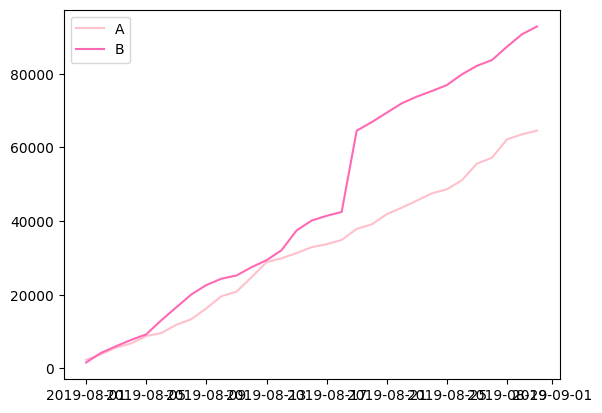

In [25]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color="pink")

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color="hotpink")

plt.legend()

Como podemos observar ambos grupos (A y B) muestran un aumento en sus ingresos, recordemos que sumamos los ingresos por día lo que nos hace más fácil el análisis por grupo.

Los ingresos tienen un aumento bastante constante y similar los primeros días, pero podemos obsrvar que ambos grupos tienen picos de ingresos respectivamente, esto nos podría indicar un aumento en las ventas o ventas de mayor valor que causen estas dierencias

Ambos grupos iniciaron en 0 pero el grupo B muestra mayor ganancias desde el inicio, teniendo un aumento considerable en un punto del test.

Si el grupo B es aquel que fue manipulado para el test nos podría indicar un buen inicio para continuar con la spruebas y seguir ese patrón para mejorar las ventas en general.
La realidad es que no concomos que condiciones tiene cada grupo en la prueba, lo que solo nos queda indicar que en cuanto a ingresos el grupo B ha dado mejor resultados en este test.

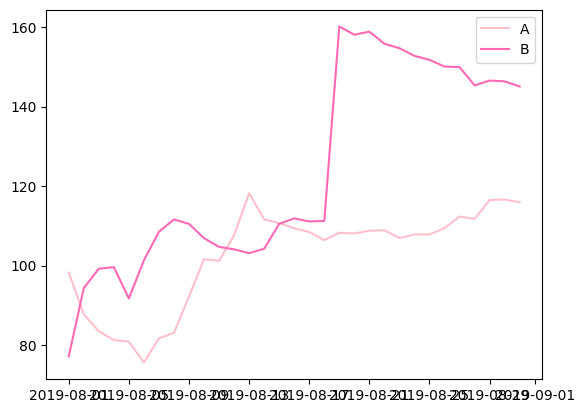

In [26]:
#Representa gráficamente el tamaño de pedido promedio acumulado por grupo. 

#uso de la tabla creada anteriormente se manda a graficar
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color="pink")
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color="hotpink")
plt.legend()

Como podemos observar ambas gráficas muestran aumentos y caidas abruptas en las primeras etapas de la prueba en relación a las compras. 

El grupo A muestra primero caidas constantes que luego mejoran con el paso del tiempo, aunque aun mostrando cambios en su comportamiento sin encontrar un punto de estabilidad (aún) dentro de la prueba.

El grupo B muestra al inicio un aumento en sus compras, aunque tambien caidas, aunque no tan etremas como en el grupo A, simpre logrando mejorar sus números, teniendo un día de extremas ventas que coinciden en tiempo con el incrmeento de las ganancias en dicho grupo vistas anteriormente.

Las gráficas no muestras aún periodo de estabilización para las compras de nuestros grupos, a finales de la prueba existe una ligera estabilización pero esta no puede ser aún considerada estable al 100%.

Para ambos grupos se necesita más tiempo para poder tener un dato estable sobre el promedio de compras en ambos grupos.

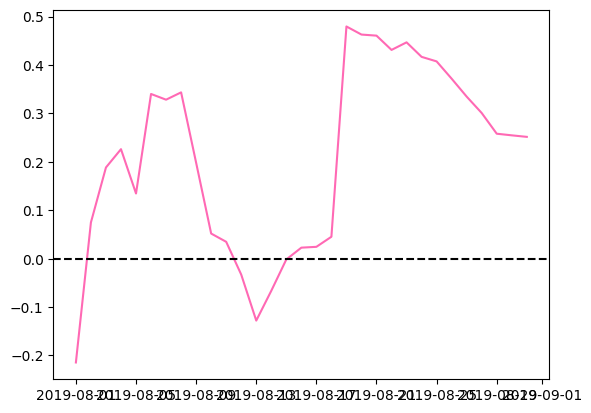

In [27]:
#Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. 
# reunir los datos en un Data nuevo
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, color="hotpink")

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

En varios puntos de la gráfica, la diferencia entre los segmentos aumenta. 

Esto significa que debe haber algunos pedidos grandes y valores atípicos, los cuales pueden estar afectar el comportamiento de la gráfica, estos valores los encontraremos posteriormente pero ahora tenemos conocimiento de esto.

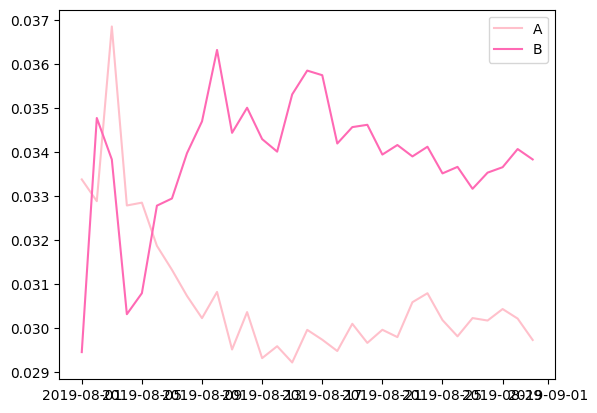

In [28]:
#Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. 

# crear una nueva columna para la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# trazar los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color="pink")
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color="hotpink")
plt.legend()

La relación entre las compras y las visitas en ambos grupos muestran un gran movimiento.

Los grupos no estan arrojando datos nada similares, muestras aumentos  caidas bastante grandes a inicio de las pruebas y aunque no eiste un punto de estabilidad aún, ambos grupos parecen tener su propio rango del cual no fluctuan.

El grupo A paraece estar en un rango de 0.029 a 0.031 en todo momento y el grupo B esta dentro de un rango 0.034 a 0.037, teniendo mayor rango de flucutaución el 2do grupo.

Lo que es evidente en todas las gráficas y vuelve a repetirse en esta es que l grupo B tiene mucho mejores resultados en sus números. 

In [29]:
#Traza un gráfico de dispersión del número de pedidos por usuario. 

#crea un data para buscar el número de pedidos por usuario
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
#cambia el nombre de las columnas
ordersByUsers.columns = ['visitorId', 'total_orders']

#imprime el promedio de pedidos por usuario
print(ordersByUsers.sort_values(by='total_orders', ascending=False))

       visitorId  total_orders
1023  4256040402            11
591   2458001652            11
569   2378935119             9
487   2038680547             8
44     199603092             5
...          ...           ...
359   1484903144             1
360   1485964287             1
361   1494664757             1
362   1495112755             1
1030  4283872382             1

[1031 rows x 2 columns]


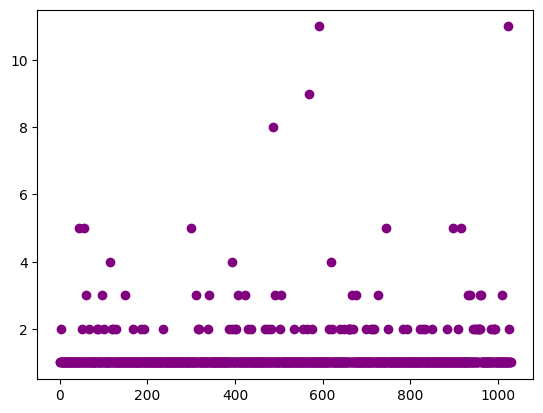

In [30]:
total_order = pd.Series(range(0,len(ordersByUsers)))
 #crear el gráfico de dispersión 
plt.scatter(total_order, ordersByUsers['total_orders'], color="purple")

Como ya esperabamos existen alguno pedidos de los usuarios de grandes cantidades que estan creando estos sesgos en las gráficas.
Teniendo número de pedidos que sesgan los resultados.

Basados en el gráfico, la mayor cantidad de nuestros clientes solo hace 1 pedido, sin embargo, una parte significativa realiza de 2 a 5 pedidos por usuario.  Los casos  más atipicos fueron clientes que hicieron 11 pedidos, los cuales sesgan los resultados promedio.

Calcularemos los percentiles para conocer que cantidad de paquetes ya es anormal y debe ser considerada para nuestro estudio y evitar sesgos.

In [31]:
#Calcula los percentiles 95 y 99 del número de pedidos por usuario. 
#coloca rango visto en las gráficas para su calculo
print(np.percentile(range(1,11), [95, 99]))

[9.55 9.91]


Solo el 5% de los usuarios realian pedidos arriba de 9 (9.5 ) y solo el 1% de los usuarios realian pedidos arriba de 10 veces, lo que hace que estos usuarios sean nuestros valores atipicos a considerar para nuestro test.

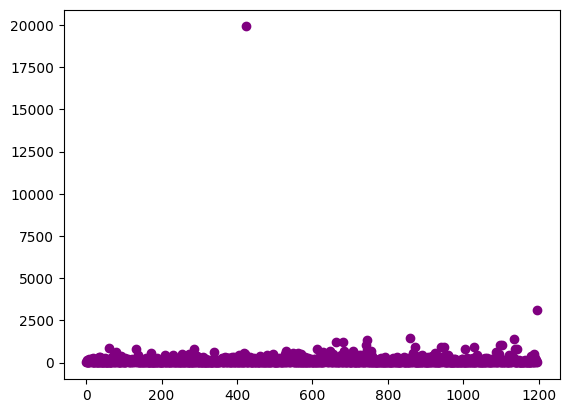

In [32]:
#Traza un gráfico de dispersión de los precios de los pedidos. 

#considerar el precio de revenue de las ordenes 
revenue = pd.Series(range(0, len(orders['revenue'])))
#creación de gráfico de dispersión 
plt.scatter(revenue, orders['revenue'], color="purple")

In [33]:
#Calcula los percentiles 95 y 99 de los precios de los pedidos. 

#coloca rango de revenue de la tabla orders
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


Solo el 5% de los usuarios reazlian pedidos con un valor arriba de $453.54 y solo el 1% de los usuarios reazlian pedidos con un valor arriba de $900.9 , lo que hace que estos usuarios sean nuestros valores atipicos a considerar para nuestro test.

A partir de este momento nuestra tarea es definir el punto en el cual un punto de datos se convierte en una anomalía.
Para esto estaremos calculando las significancias estadísticas necesarias para poder sacar conclusiones de nuestras pruebas.

In [34]:
#Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. 

#creaemos variables para almacenar información del grupo A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

#cambio de nombre a las columnas
ordersByUsersA.columns = ['userId', 'orders']

#creaemos variables para almacenar información del grupo B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
#cambio de nombre a las columnas
ordersByUsersB.columns = ['userId', 'orders']

#concatenar 
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series( 0,index=np.arange( visits[visits['group'] == 'A']['visits'].sum()- len(ordersByUsersA['orders']) ),
            name='orders', ), ],axis=0,)
sampleB = pd.concat( [ ordersByUsersB['orders'], pd.Series( 0, index=np.arange( visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])),
            name='orders', ), ], axis=0,)

#hace prueba formateada p a 3 decimales 
print('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


Según los datos sin procesar, si hay diferencia entre los grupos A y B. 

El primer resultado nos da el valor p 0.0169, que es menor que 0.05. 
Con estos datos podemos rechazar la hipótesis nula ya que si hay una diferencia estadísticamente significativa en la conversión entre los grupos A y B. 

Pero la pérdida relativa del grupo B es del 13.8% (segundo rsultado)

In [35]:
#Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. 

print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


El valor p es notablemente superior a 0.05, por lo que no hay motivo para rechazar la hipótesis nula y concluir que el tamaño promedio de los pedidos difiere entre los grupos. 

No obstante, el tamaño de pedido promedio para el grupo B es más pequeño que para el grupo A.  

In [40]:
#Vamos a encontrar el número total de usuarios anómalos

#crea la variable y concatena
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)

#hace el filtro
usersWithExpensiveOrders = orders[orders['revenue'] > 435.5]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers)
print(abnormalUsers.shape)

1099     148427295
928      204675465
684      358944393
648      382846391
1189     393266494
751      689129267
1137     759473111
77       787824685
654      816783716
339      834731816
949      887908475
744      888512513
563      935349363
709      950626008
1103    1164614297
137     1211585711
1136    1307669133
858     1316129916
421     1357170471
549     1367935136
562     1452540367
1121    1604853044
420     1606766439
425     1920142716
227     2038680547
1196    2108080724
570     2247666522
287     2254456485
131     2254586615
1006    2261934787
273     2278620397
755     2279926127
326     2378935119
278     2458001652
1142    2606908679
254     2686716486
527     2837914161
925     2840985286
890     2853587382
530     2912540959
73      2947100995
173     2953427180
960     2999642019
1096    3062433592
208     3118156181
481     3177790019
78      3288820196
746     3321013705
728     3357398384
867     3372131337
1087    3590655705
613     3931967268
496     3951

En total, tenemos 59 usuarios anómalos. 

In [37]:
#Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

#Primero prepararemos muestras del número de pedidos por usuario para cada grupo de prueba
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)


In [41]:
#manda a imprimir con los filtros y a 3 decimales p
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.016
0.149


Resultados sin filtro: 0.01679 y 0.138

Como podemos observar los resultados casi no cambiaron a pesar del filtro

In [45]:
#Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

print( "{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
            orders[ np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),) ]['revenue'], )[1]))

print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(
                orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean() - 1))


0.929
-0.014


Resultados antriores: 0.692 y 0.252

El valor p disminuyó y además el valor del grupo B ha disminuido significativamnete con el filtro. 

Logrando observar como los valores anamolos afectan considerbalmente en nuestra prueba para la toma de decisiones.

**Toma una decisión basada en los resultados de la prueba**

Las decisiones posibles son:

-Parar la prueba, considerar a uno de los grupos como líder.

-Parar la prueba, concluir que no hay diferencia entre los grupos.

-Continuar la prueba.

# Conclusiones

Aquí están los hechos:

-Ni los datos sin procesar y los filtrados revelaron diferencias estadísticamente significativas en la conversión entre los grupos.

- Los datos sin procesar y los filtrados revelaron diferencias estadísticamente significativas en el tamaño promedio de los pedidos entre los grupos.

- El gráfico que muestra la diferencia de conversión entre los grupos nos dice que los resultados del grupo B son mucho mejores que el grupo aA, por lo que cuadra con que si existen diferencias significativas desde los gráficos netre ambos grupos

- Los gráficos no muestran que hayamos llegado a un punto de estabilidad con las compras entre ambos grupos.

-El grupo B ha traido consderablmente mejores ingreso a la empresa.

Basándonos en estos hechos, podemos concluir que es necesario continuar con la prueba pues no hemos podido lograr estabilizar ambos grupos y esto nos crea diferencias significativas que podrías hacernos tomar una mala decisión en cuento al resultado de esta prueba. Esper. 